# Optimal Parameter Search

In [1]:
import numpy as np
import scipy as sp
from libsvmdata import fetch_libsvm

from src.experiment.parameter_search import parameter_search

In [2]:
datasets = ["fourclass"] # ["a7a", "a9a", "w7a", "w8a", "phishing"]
# max number of iterations for finding saddle with extragradient
num_iter_solution = 500000

# max time for finding saddle with extragradient
max_time_solution = 3600
# tolerance of solution obtained with extragradient
tolerance_solution = 1e-10
# required accuracy of sliding
eps = 1e-10
seed = 30

In [3]:
# number of nodes
num_nodes = 25

regcoef_x = 2.0
regcoef_y = 2.0
r_x = 5.0
r_y = 0.0
comm_budget_experiment = 5000

In [7]:
methods = ["extragrad_con", "sliding", "extragrad", "vi_adom"]
topologies = ["grid", "ring", "star"]
labels = ['EGD-CON', 'Sliding', 'EGD-GT', 'Alg.2']

In [8]:
from typing import Tuple

def get_A_b(data: str) -> Tuple[np.ndarray, np.ndarray]:
    A, b = fetch_libsvm(data)
    if sp.sparse.issparse(A):
        A = A.toarray()
    
    return A, b

In [6]:
p = {
    "extragrad_con": {"gamma": [1]},
    "sliding": {"gamma": [1]},
    "extragrad": {"eta": [1]},
    "vi_adom": {"eta_x": [1, 0.5], "eta_y": [0.5], "eta_z": [1, 0.5]},
}

Method: Alg.2





Parameters...:   0%|                                                                                                                                                 | 0/4 [00:00<?, ?it/s]

Running src VI ADOM with stepsize_factor: 1 for eta_z parameter...





Parameters...:  25%|██████████████████████████████████▎                                                                                                      | 1/4 [00:30<01:31, 30.41s/it]

argument_primal_distance_to_consensus, argument_primal_distance_to_opt, gradient_primal_distance_to_opt can be accessed at corresponding logger class fields.
Running src VI ADOM with stepsize_factor: 0.5 for eta_z parameter...





Parameters...:  50%|████████████████████████████████████████████████████████████████████▌                                                                    | 2/4 [00:53<00:52, 26.25s/it]

argument_primal_distance_to_consensus, argument_primal_distance_to_opt, gradient_primal_distance_to_opt can be accessed at corresponding logger class fields.
Running src VI ADOM with stepsize_factor: 1 for eta_z parameter...





Parameters...:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 3/4 [01:22<00:27, 27.35s/it]

argument_primal_distance_to_consensus, argument_primal_distance_to_opt, gradient_primal_distance_to_opt can be accessed at corresponding logger class fields.
Running src VI ADOM with stepsize_factor: 0.5 for eta_z parameter...





Parameters...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:50<00:00, 27.52s/it]

argument_primal_distance_to_consensus, argument_primal_distance_to_opt, gradient_primal_distance_to_opt can be accessed at corresponding logger class fields.


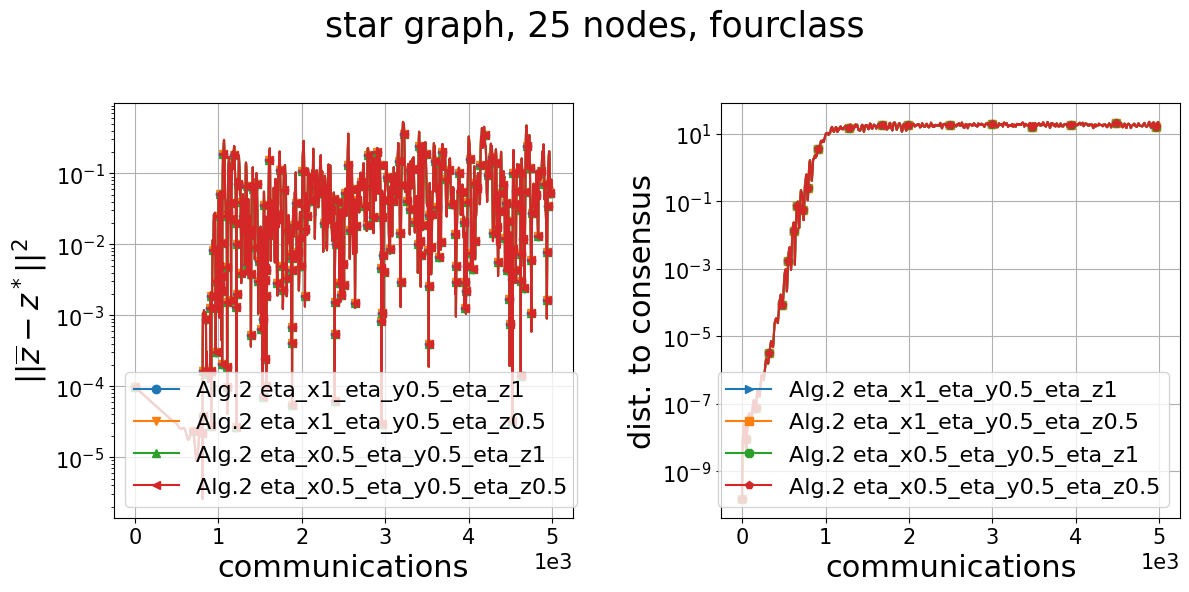



Methods...: 4it [03:31, 52.80s/it]

Datasets...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [09:41<00:00, 581.48s/it]


In [7]:
parameter_search(
    methods=methods,
    topologies=topologies,
    datasets=datasets,
    num_nodes=num_nodes,
    num_states=comm_budget_experiment,
    labels=labels,
    regcoef_x=regcoef_x,
    regcoef_y=regcoef_y,
    r_x=r_x,
    r_y=r_y,
    eps=eps,
    num_iter_solution=num_iter_solution,
    max_time_solution=max_time_solution,
    tolerance_solution=tolerance_solution,
    comm_budget_experiment=comm_budget_experiment,
    experiment_type="real",
    stepsize_factors=p, #[0.25, 0.1, 0.01, 0.001],
    get_A_b=get_A_b,
)